In [289]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.fft as fft

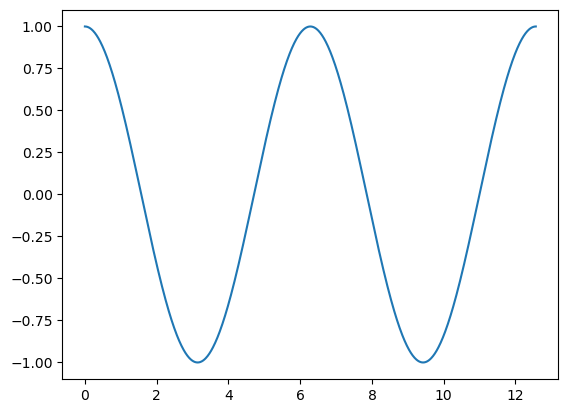

In [290]:
nf=40
h=np.ones(2*nf+1)
h/=h.sum()

nt=1001
t=np.linspace(0,4*np.pi,nt)
x=np.cos(t)

plt.plot(t,x)

In [291]:
xf=np.zeros([4,nt])*np.nan
for i in range(0,nt):
    if i<=2*nf:
        xf[0,i] = np.mean(x[:i+1])
        xf[1,i] = np.mean(x[:i+1])*i/(2*nf) + (1-i/(2*nf))*0
    else:
        xf[0,i-2*nf+1] = np.mean(x[i-(2*nf+1):i])
        xf[1,i-2*nf+1] = np.mean(x[i-(2*nf+1):i])

    if i<nt-2*nf-1:
        xf[2,i+2*nf+1] = np.mean(x[i:i+(2*nf+1)])
        xf[3,i+2*nf+1] = np.mean(x[i:i+(2*nf+1)])
    else:
        xf[2,i] = np.mean(x[i:])
        xf[3,i] = np.mean(x[i:])*(nt-i)/(2*nf) + (1-(nt-i))/(2*nf)*0
        

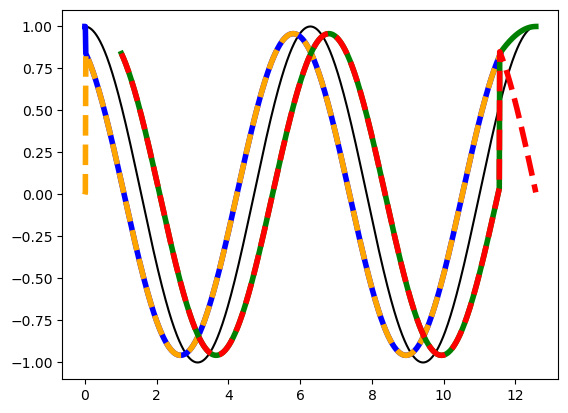

In [292]:
lw=4
plt.plot(t,x,'k-')
plt.plot(t,xf[0],'blue',linewidth=lw)
plt.plot(t,xf[1],'orange',linestyle='--',linewidth=lw)
plt.plot(t,xf[2],'g',linewidth=lw)
plt.plot(t,xf[3],'r--',linewidth=lw)

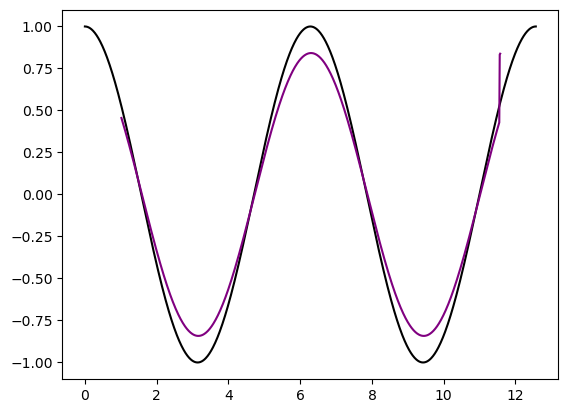

In [293]:
plt.plot(t,x,'k-')
plt.plot(t,0.5*(xf[0]+xf[2]),color='purple')


In [294]:
nt = int(1e5)
dt = 0.01
tau = 2
r = 1 
a = 2
t=np.arange(0,nt*dt,dt)
x=np.zeros(nt)
for i in range(0,nt-1): 
    x[i+1]=np.exp(-dt/tau)*x[i]+r*np.sqrt(2*dt/tau)*np.random.randn(1)
s=a*np.sin(np.pi*t/10)
y=x+s

/tmp/ipykernel_8901/792181249.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i+1]=np.exp(-dt/tau)*x[i]+r*np.sqrt(2*dt/tau)*np.random.randn(1)


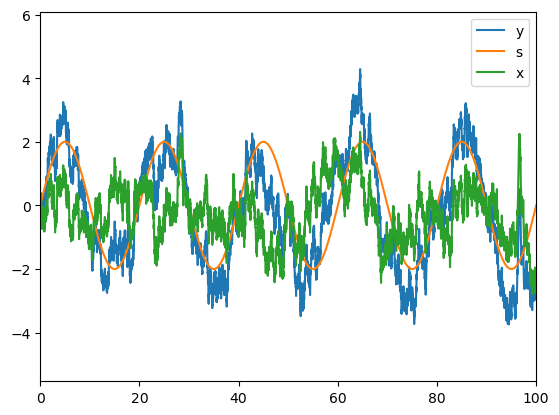

In [302]:
plt.plot(t,y,label='y')
plt.plot(t,s,label='s')
plt.plot(t,x,label='x')
plt.xlim([0,100])
plt.legend()

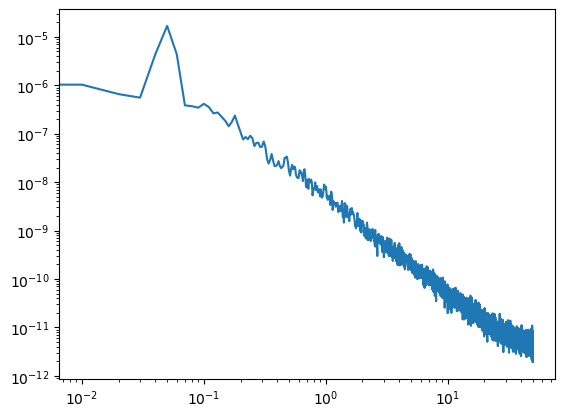

In [296]:
f,p = sig.welch(y,nperseg=int(1e4),fs=1/dt)
plt.loglog(f,p*dt/nt)

(0.0, 100.0)

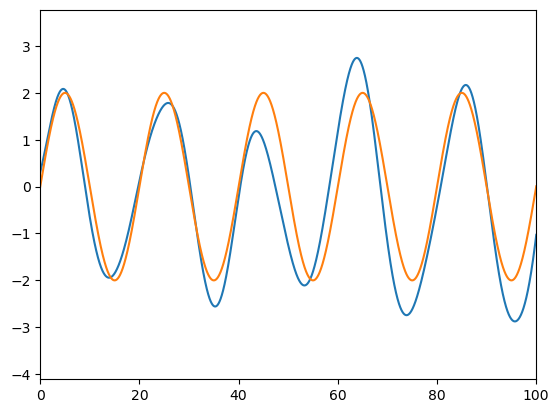

In [303]:
b, a = sig.butter(4, dt/5, 'low', analog=False)
#b, a = sig.butter(4, dt/20, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.plot(t,s)
b, a = sig.butter(4, dt/5, 'high', analog=False)
#plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.xlim([0,100])


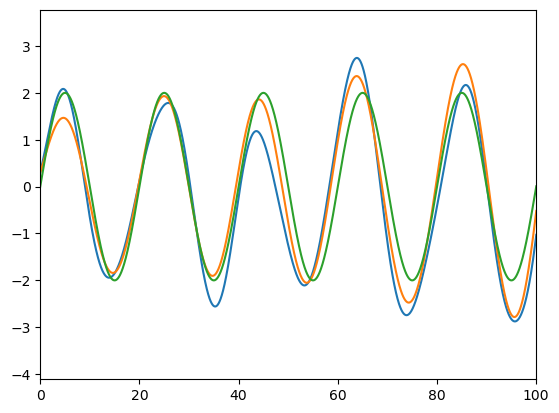

In [298]:
b, a = sig.butter(4, dt/5, 'low', analog=False)
#b, a = sig.butter(4, dt/20, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
b, a = sig.butter(2, [dt/15,dt/7.5], 'band', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.xlim([0,100])

plt.plot(t,s)


(0.0, 100.0)

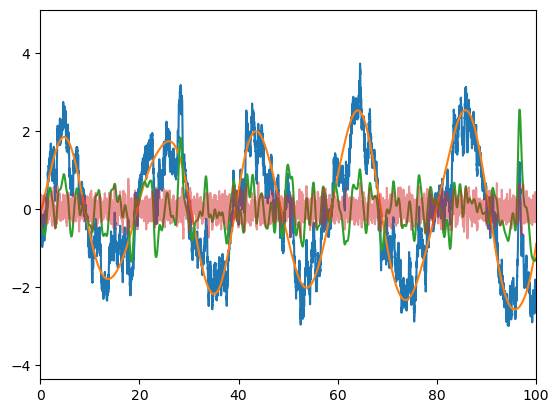

In [299]:
#b, a = sig.butter(4, dt/5, 'low', analog=False)
#b, a = sig.butter(4, dt/20, 'high', analog=False)
#plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
b, a = sig.butter(2, dt/15, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
b, a = sig.butter(2, [dt/15,dt/5], 'band', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
b, a = sig.butter(2, [dt/5,dt/0.5], 'band', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
b, a = sig.butter(2, dt/0.5, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter',alpha=0.5)
plt.xlim([0,100])


(0.0, 100.0)

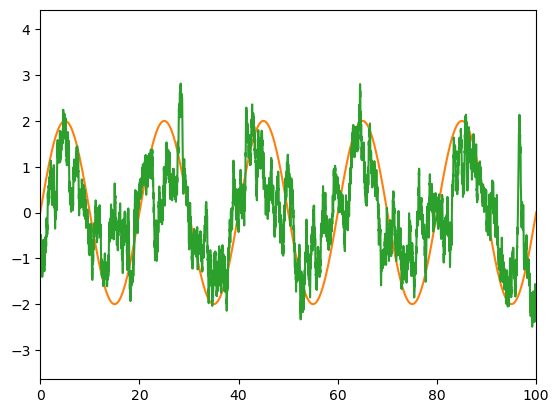

In [300]:
b, a = sig.butter(8, dt/40, 'low', analog=False)
#b, a = sig.butter(4, dt/20, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.plot(t,s)
b, a = sig.butter(4, dt/10, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.xlim([0,100])


(0.0, 100.0)

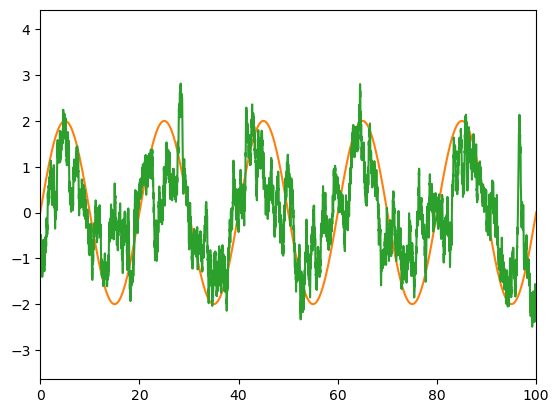

In [301]:
b, a = sig.butter(8, dt/40, 'low', analog=False)
#b, a = sig.butter(4, dt/20, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.plot(t,s)
b, a = sig.butter(4, dt/10, 'high', analog=False)
plt.plot(t,sig.filtfilt(b,a,y),label='IIR filter')
plt.xlim([0,100])


- FIR filter is  $$y_k = \sum_{i=-m}^{i=m} b_i x_{k+i} $$

- If we wrote this as a matrix equation we would have something like: 

$$ \vec{y} = B\vec{x} $$

- Suppose that we make  $$x=\begin{pmatrix} 0 \\  \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\0 \end{pmatrix}$$ 

- then $$ B\vec{x} = B_{ii} $$ where $i$ is the index  that 

- IIR filter is $$\sum_{i=-m}^{i=m}a_i y_{k+i} = \sum_{i=-m}^{i=m}b_i x_{k+i} $$

- If we wrote this as a matrix equation we would have something like: 

$$ A\vec{y} = B\vec{x} $$

$$ \vec{y} = A^{-1}B\vec{x} $$

$$ \begin{pmatrix} a_0  \end{pmatrix} $$